In [47]:
!git checkout tags/comprendre_la_donnee

M	data/Cyclistes/cycliste_1.csv
M	data/Cyclistes/cycliste_10.csv
D	data/Cyclistes/cycliste_100.csv
D	data/Cyclistes/cycliste_101.csv
D	data/Cyclistes/cycliste_102.csv
D	data/Cyclistes/cycliste_103.csv
D	data/Cyclistes/cycliste_104.csv
D	data/Cyclistes/cycliste_105.csv
D	data/Cyclistes/cycliste_106.csv
D	data/Cyclistes/cycliste_107.csv
D	data/Cyclistes/cycliste_108.csv
D	data/Cyclistes/cycliste_109.csv
M	data/Cyclistes/cycliste_11.csv
D	data/Cyclistes/cycliste_110.csv
D	data/Cyclistes/cycliste_111.csv
D	data/Cyclistes/cycliste_112.csv
D	data/Cyclistes/cycliste_113.csv
D	data/Cyclistes/cycliste_114.csv
D	data/Cyclistes/cycliste_115.csv
D	data/Cyclistes/cycliste_116.csv
D	data/Cyclistes/cycliste_117.csv
D	data/Cyclistes/cycliste_118.csv
D	data/Cyclistes/cycliste_119.csv
M	data/Cyclistes/cycliste_12.csv
D	data/Cyclistes/cycliste_120.csv
D	data/Cyclistes/cycliste_121.csv
D	data/Cyclistes/cycliste_122.csv
D	data/Cyclistes/cycliste_123.csv
D	data/Cyclistes/cycliste_124.csv
D	data/Cyclistes/cy

On crée une session Spark : 

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

On commence par visualiser la donnée pour comprendre ce que contient les bases.

In [218]:
# Chemin vers le fichier
path  = "./../data/Prestataires/Prestataire_1.csv"
# lecture avec détection des types des colonnes
prestataire = spark.read.format("csv").option("header", "true").load(path)
# on regarge la donnée en affichant les premières lignes, ici il n'y en a qu'une seule
print(prestataire.count())
prestataire.show(20)


1
+-------------+-------+-------+
|           id|largeur|hauteur|
+-------------+-------+-------+
|Prestataire_1|      5|      5|
+-------------+-------+-------+



Ici le fichier Prestataire est très simple, avec une seule ligne qui comprend un identifiant, et deux valeurs, qui sont la taille du réseau, en unité (Km ou autre), sur la largeur et la hauteur.

Continuons pour le fichier ville : 

In [219]:
path  = "./../data/Villes/ville_1.csv"
ville = spark.read.format("csv").option("header", "true").load(path)
print(ville.count())
ville.show(5)

51
+---+------------------+------------------+-------------------+-------------------+-------+-------+--------------------+------------------+----+---+-------------------+------------------+
| id|    vitesse_a_pied|    vitesse_a_velo|               home|            travail|sportif|casseur|              statut|           salaire|sexe|age|         sportivite|velo_perf_minimale|
+---+------------------+------------------+-------------------+-------------------+-------+-------+--------------------+------------------+----+---+-------------------+------------------+
|  1|0.7711549783970157|2.0564132757253755|(lon:2.83 lat:0.09)|(lon:2.87 lat:0.46)|  False|  False|technicien_de_sur...|17275.441282043903|   H| 78| 2.5705165946567194|               0.4|
|  2| 2.876266487577789| 7.190666218944473|(lon:2.17 lat:1.03)|(lon:0.94 lat:2.57)|   True|  False|technicien_de_sur...| 12763.48275789574|   F| 65|  4.793777479296315| 5.193777479296315|
|  3|0.1268370477025138|0.3382321272067035|(lon:0.31 lat:

Le fichier ville est bien plus grand. Pour vérifier qu'il est bien construit on peut en prendre un extrait aléatoire grâcce à la fonction *sample* qui prend en paramètre un pourcentage (<1) de données que l'on veut récupérer. Si l'on souhaite 2 lignes aléatoires, il faut donc donner en paramètre *2 / nb de ligne* soit *2/df.count()*, comme ci dessous. On notera que le résultat est une approximation (nous n'obtenons pas forcément deux lignes) : 

In [223]:
ville.sample(2/ville.count()).collect()

[Row(id='6', vitesse_a_pied='0.02', vitesse_a_velo='0.05', home='(lon:3.39 lat:2.48)', travail='(lon:3.56 lat:1.24)', sportif='False', casseur='False', statut='cadre', salaire='65624.99990143602', sexe='F', age='68', sportivite='0.1', velo_perf_minimale='0.4'),
 Row(id='10', vitesse_a_pied='0.7591896747816971', vitesse_a_velo='2.024505799417859', home='(lon:3.66 lat:1.71)', travail='(lon:1.03 lat:3.27)', sportif='False', casseur='False', statut='reserviste', salaire='19924.75532088677', sexe='H', age='28', sportivite='2.530632249272324', velo_perf_minimale='0.4'),
 Row(id='38', vitesse_a_pied='0.5570835101808329', vitesse_a_velo='1.4855560271488877', home='(lon:1.08 lat:0.41)', travail='(lon:1.65 lat:2.98)', sportif='False', casseur='False', statut='reserviste', salaire='15396.42003884591', sexe='H', age='83', sportivite='1.8569450339361095', velo_perf_minimale='0.4'),
 Row(id='48', vitesse_a_pied='0.1308350515183941', vitesse_a_velo='0.3270876287959853', home='(lon:3.50 lat:1.66)', tr

Il peut être intéressant de transformer la dataframe en objet Pandas pour avoir une bonne vue de sa structure : 

In [90]:
ville.sample(5/ville.count()).toPandas()

,id,vitesse_a_pied,vitesse_a_velo,home,travail,sportif,casseur,statut,salaire,sexe,age,sportivite,velo_perf_minimale
0,43,0.4567003119977174,1.1417507799942934,(lon:2.59 lat:2.99),(lon:0.46 lat:2.04),False,False,reserviste,39783.093761067146,F,76,2.283501559988587,0.4
1,49,0.6013089902319528,1.603490640618541,(lon:1.46 lat:2.96),(lon:1.89 lat:3.44),False,False,cadre,109071.20847575035,H,16,2.0043633007731763,0.4


On découvre les différentes caractéristiques des cyclistes. Comprendre chacune de ces colonnes fait parti de l'enjeu de la relation avec le métier. Ici les intitulés de colonne nous semblent assez clairs.
:arrow_forward: Remarque : La technique de passer sur des dataFrames pandas en prenant aléatoirement des lignes de la DataFrame Spark est très utile dans la phase de modélisation et vérification de vos données. Ainsi vous éviter les temps de calculs trop longs du à l'accès disque, et vous pouvez rapidement prototyper votre code : il vous suffira de supprimer les sample pour relancer les calculs à grande échelle. Vous pouvez même décider d'une variable qui contiendrait le pourcentage de sample que vous voudriez : il vous suffirait alors de changer cette variable au nombre de ligne de ligne de votre DataFrame Spark pour obtenir un sample de 100%, soit la dataframe complète.

Continuons avec les vélos. Dans ce répertoire il y a beaucoup de fichiers, on peut donc utiliser l'option de Spark qui permet d'aggréger automatiquement tous les fichiers d'un répertoire, via les *expressions régulières* de type *"*.csv"* qui permettent de sélectionner tous les fichier *csv* d'un répertoire. Spark se chargera de lire chaque fichier et de l'ajouter à la DataFrame ainsi créée.

In [226]:
path  = "./../data/Velos/*.csv"
velos = spark.read.format("csv").option("header", "true").load(path)
velos.sample(10/velos.count()).show()

+--------+------------------+-------------------+
| velo_id|       performance|          timestamp|
+--------+------------------+-------------------+
| velo_88|0.8704336639954662|2018-01-01 03:41:00|
| velo_66|              0.85|2018-01-01 20:55:00|
|velo_294|0.8496578531824213|2018-01-01 14:17:00|
|velo_244|0.8463925399472028|2018-01-01 18:25:00|
|velo_251| 0.846819123121496|2018-01-01 10:26:00|
| velo_81| 0.927165155078991|2018-01-01 17:27:00|
| velo_68|              0.85|2018-01-01 08:53:00|
| velo_74|              0.85|2018-01-01 23:48:00|
|  velo_9|              0.85|2018-01-01 13:49:00|
+--------+------------------+-------------------+



Le fichier des vélos semble bien formé, passons à celui des stations :

In [227]:
path  = "./../data/Stations/*.csv"
stations = spark.read.format("csv").option("header", "true").load(path)
stations.sample(10/stations.count()).show()

+-------------------+----------+-----------+--------+------------------+---------+
|          timestamp|station_id|cycliste_id| velo_id|  velo_performance|   action|
+-------------------+----------+-----------+--------+------------------+---------+
|2018-01-01 08:24:00|         9|          1|    null|              null|     null|
|2018-01-01 04:31:00|        10|         17| velo_47|              0.85|recuperer|
|2018-01-01 12:46:00|         8|         46| velo_65|0.9874407589944962|   donner|
|2018-01-01 20:40:00|        14|         38|velo_155|              0.85|   donner|
|2018-01-01 23:48:00|         7|          1|    null|              null|     null|
|2018-01-01 16:51:00|        19|         20|velo_253|              0.85|   donner|
|2018-01-01 21:30:00|        20|         23|velo_129|              0.85|recuperer|
+-------------------+----------+-----------+--------+------------------+---------+



Ici le fichier semble étrange : 
    - certains champs sont vides sur les premières lignes
    - la date est remplacée par un mot dans la 4è ligne
    - les actions sont parfois à vide
Que se passe-t-il ? Les identifiants des stations sont divers. Commençons par nous concentrer sur une seule station pour affiner notre compréhension.

On note que si on veut garder les premières lignes de  la DataFrame, on doit passer par la fonction *take* qui renvoie une liste, et retransformer cette liste en DataFrame que l'on convertit ensuite en Pandas

In [255]:
path       = "./../data/Stations/log_stations_17.csv"
station_17 = spark.read.format("csv").option("header", "true").load(path)
print(station_17.count())
spark.createDataFrame(station_17.head(10)).toPandas()

27


,timestamp,station_id,cycliste_id,velo_id,velo_performance,action
0,timestamp,station_id,cycliste_id,velo_id,velo_performance,action
1,timestamp,station_id,performance,None,None,None
2,2018-01-01 05:11:00,17,1,None,None,None
3,reparee,None,None,None,None,None
4,2018-01-01 06:45:00,17,19,velo_130,0.85,recuperer
5,2018-01-01 06:45:00,17,1,None,None,None
6,2018-01-01 07:18:00,17,45,velo_224,0.85,donner
7,2018-01-01 07:18:00,17,1,None,None,None
8,2018-01-01 09:22:00,17,55,velo_229,0.85,donner
9,2018-01-01 09:22:00,17,1,None,None,None


Ici on est fasse à un fichier de log mal formatté. C'est souvent le cas dans la vie réelle... On a créé cet exemple pour apprendre à gérer ce type de difficulté. Expliquons nous sur la structure de ce fichier.
Il y a trois niveaux de logs : 
1. un niveau *complet* : lignes 4, 6, 8 par exemple. C'est le log normal auquel on devrait s'attendre : la station note l'heure, l'identifiant du cycliste et du vélo qui est pris à chaque *transaction*. La ligne 1 est d'ailleurs un bis-repetita des titres de la dataframe
2. un niveau *performance* :  ce sont les lignes 1, 2, 5, 7, 9 qui n'ont que les trois premières colonnes de remplies. On remarque que les dates sont les même que pour les lignes les précédents : la station enregistre son état / sa performance à chaque intéraction avec un cycliste.
3. un niveau *inutile* : la ligne 3, qui contient juste un log, sans heure. Il n'est pas clair que l'on puisse faire quelque chose avec cela, mais il faut le gérer.
L'enjeu ici va donc être de filtrer cette dataframe en trois, pour séparer ces trois informations. Comment faire ? 

On va utiliser une astuce qui consiste à filtrer en trois temps, avec les fonctions fournies dans le module *sql* de spark : 
- F.col : pour sélectionner une colonne spécifique
- F.isnull : pour savoir quelles lignes sont nulles

Le tout couplé à la clause *where* de la datframe, qui permet de ne retenir que les lignes où le filtre est vrai.

La structure des trois niveaux de logs nous permet de procéder de la manière suivante :

1. On récupère donc les lignes où la seconde colone *station_id* est nulle. 
2. On crée une nouvelle dataframe sans ces lignes a écarter, grâce à la fonction *exceptAll*
3. On fait de même sur cette nouvelle dataFrame, avec la colonne *velo_id* 
4.  En réutilisant *exceptAll* on obtient notre troisième dataFrame 

In [256]:
from pyspark.sql import functions as F
# 1. On récupère donc les lignes où la seconde colone station_id est nulle.
niveau_inutile = station_17.where(F.isnull(F.col("station_id")))
print(niveau_inutile.count(), niveau_inutile.show(3))

+---------+----------+-----------+-------+----------------+------+
|timestamp|station_id|cycliste_id|velo_id|velo_performance|action|
+---------+----------+-----------+-------+----------------+------+
|  reparee|      null|       null|   null|            null|  null|
|  reparee|      null|       null|   null|            null|  null|
| en panne|      null|       null|   null|            null|  null|
+---------+----------+-----------+-------+----------------+------+
only showing top 3 rows

5 None


Il faut aussi sélectionner uniquement la première colonne (timestamp) et la renommer : 

In [257]:
niveau_inutile.select("timestamp").withColumnRenamed("Timestamp", "Action").show(3)

+--------+
|  Action|
+--------+
| reparee|
| reparee|
|en panne|
+--------+
only showing top 3 rows



In [258]:
# 2. On crée une nouvelle dataframe sans ces lignes a écarter, grâce à la fonction exceptAll
reste_utile = station_17.exceptAll(niveau_inutile)
reste_utile.count(), reste_utile.show(3)

+-------------------+----------+-----------+--------+------------------+---------+
|          timestamp|station_id|cycliste_id| velo_id|  velo_performance|   action|
+-------------------+----------+-----------+--------+------------------+---------+
|2018-01-01 21:30:00|        17|         30|velo_230|0.8818604637760953|   donner|
|2018-01-01 06:45:00|        17|         19|velo_130|              0.85|recuperer|
|          timestamp|station_id|performance|    null|              null|     null|
+-------------------+----------+-----------+--------+------------------+---------+
only showing top 3 rows



(22, None)

In [259]:
# 3. On fait de même sur cette nouvelle dataFrame, avec la colonne velo_id
niveau_performance = reste_utile.where(F.isnull(F.col("velo_id")))
# 4. En réutilisant exceptAll on obtient notre troisième dataFrame
niveau_complet     = reste_utile.exceptAll(niveau_performance)

# Nous pouvons maintenant réduire le nombre de colonne dans la sous-datframe, avec la méthode select : 
niveau_performance = niveau_performance.select(["timestamp", "station_id", "cycliste_id"])
niveau_performance = niveau_performance.withColumnRenamed("cycliste_id", "performance")
niveau_performance.show(3)

+-------------------+----------+-----------+
|          timestamp|station_id|performance|
+-------------------+----------+-----------+
|          timestamp|station_id|performance|
|2018-01-01 05:11:00|        17|          1|
|2018-01-01 07:18:00|        17|          1|
+-------------------+----------+-----------+
only showing top 3 rows



On se rend compte que l'entête se répète au sein des données. On le supprime avec une clause Where : 

In [260]:
niveau_performance = niveau_performance.where(niveau_performance["timestamp"] != "timestamp" )
niveau_performance.sample(10/niveau_performance.count()).show()

+-------------------+----------+-----------+
|          timestamp|station_id|performance|
+-------------------+----------+-----------+
|2018-01-01 07:18:00|        17|          1|
|2018-01-01 06:45:00|        17|          1|
|2018-01-01 10:54:00|        17|          1|
|2018-01-01 10:59:00|        17|          1|
|2018-01-01 22:20:00|        17|          1|
|2018-01-01 21:30:00|        17|          1|
|2018-01-01 18:53:00|        17|          1|
|2018-01-01 14:56:00|        17|          1|
+-------------------+----------+-----------+



On peut vérifier qu'on a bien récupéré toutes les lignes : 

In [262]:
nb_de_ligne_total        = station_17.count()
nb_de_niveau_inutile     = niveau_inutile.count()
nb_de_niveau_performance = niveau_performance.count()
nb_de_niveau_complet     = niveau_complet.count()
print("""
nb_de_ligne_total         = {nb_de_ligne_total}
nb_de_niveau_inutile      = {nb_de_niveau_inutile}
nb_de_niveau_performance  = {nb_de_niveau_performance}
nb_de_niveau_complet      = {nb_de_niveau_complet}
""".format(**locals()))
# Note :  la somme ne correspond pas car nous avons supprimé des doublons de titre dans les clauses where


nb_de_ligne_total         = 27
nb_de_niveau_inutile      = 5
nb_de_niveau_performance  = 12
nb_de_niveau_complet      = 9



In [271]:
path               = "./../data/Stations/*.csv"
stations           = spark.read.format("csv").option("header", "true").load(path)

niveau_inutile     = stations.where(F.isnull(F.col("station_id")))
reste_utile        = stations.exceptAll(niveau_inutile)

niveau_performance = reste_utile.where(F.isnull(F.col("velo_id")))
niveau_complet     = reste_utile.exceptAll(niveau_performance)

niveau_inutile     =     niveau_inutile.select("timestamp")
niveau_performance = niveau_performance.select(["timestamp", "station_id", "cycliste_id"])

niveau_performance = niveau_performance.withColumnRenamed("cycliste_id", "performance")
niveau_inutile     =     niveau_inutile.withColumnRenamed("Timestamp", "Action")
niveau_performance = niveau_performance.where(niveau_performance["timestamp"] != "timestamp" )

In [272]:
niveau_complet.show(2)

+-------------------+----------+-----------+--------+----------------+---------+
|          timestamp|station_id|cycliste_id| velo_id|velo_performance|   action|
+-------------------+----------+-----------+--------+----------------+---------+
|2018-01-01 20:45:00|         6|         38|velo_155|            0.85|recuperer|
|2018-01-01 15:02:00|         4|         36| velo_57|            0.85|recuperer|
+-------------------+----------+-----------+--------+----------------+---------+
only showing top 2 rows



In [273]:
niveau_performance.show(2)

+-------------------+----------+-----------+
|          timestamp|station_id|performance|
+-------------------+----------+-----------+
|2018-01-01 13:39:00|        10|          1|
|2018-01-01 07:08:00|        19|          1|
+-------------------+----------+-----------+
only showing top 2 rows



On peut vérifier qu'on a bien récupéré toutes les lignes : 

In [270]:
nb_de_ligne_total        = stations.count()
nb_de_niveau_inutile     = niveau_inutile.count()
nb_de_niveau_performance = niveau_performance.count()
nb_de_niveau_complet     = niveau_complet.count()
print("""
nb_de_ligne_total         = {nb_de_ligne_total}
nb_de_niveau_inutile      = {nb_de_niveau_inutile}
nb_de_niveau_performance  = {nb_de_niveau_performance}
nb_de_niveau_complet      = {nb_de_niveau_complet}
""".format(**locals()))
# Note :  la somme ne correspond pas car nous avons supprimé des doublons de titre dans les clauses where


nb_de_ligne_total         = 588
nb_de_niveau_inutile      = 109
nb_de_niveau_performance  = 257
nb_de_niveau_complet      = 197



Passons désormais au fichier des cyclistes :

In [235]:
path      = "./../data/Cyclistes/*.csv"
cyclistes = spark.read.format("csv").option("header", "true").load(path)
cyclistes.show(3)

+---+-------------------+--------+-----+-------------------+-------------------+------------------+
| id|          timestamp|sur_velo| velo|            vitesse|           position|destination_finale|
+---+-------------------+--------+-----+-------------------+-------------------+------------------+
| 28|2018-01-01 00:01:00|   False|False|0.09038558965865744|(lon:2.29 lat:1.30)|             False|
| 28|2018-01-01 00:02:00|   False|False|0.09038558965865744|(lon:2.29 lat:1.30)|             False|
| 28|2018-01-01 00:03:00|   False|False|0.09038558965865744|(lon:2.29 lat:1.30)|             False|
+---+-------------------+--------+-----+-------------------+-------------------+------------------+
only showing top 3 rows



Quand on regarde le type des données on voit que les logiques fonctionnelles (avoir une date dans le timestamp, un booléen sur *sur_velo*, un float sur la vitesse ne sont pas respectées : 

In [236]:
cyclistes.dtypes

[('id', 'string'),
 ('timestamp', 'string'),
 ('sur_velo', 'string'),
 ('velo', 'string'),
 ('vitesse', 'string'),
 ('position', 'string'),
 ('destination_finale', 'string')]

On peut faire comprendre à Spark quel est le type de chaque colonne en précisant un schéma à la lecture du fichier.
Le module pyspark propose différentes classes qui permettent de préciser le type des objets afin d'en faciliter la gestion pour Spark (qui est codé en Scala, où les variables sont typés).

In [237]:
# Import des types usuels :
from pyspark.sql.types import StructField
from pyspark.sql.types import StringType
from pyspark.sql.types import TimestampType
from pyspark.sql.types import BooleanType
from pyspark.sql.types import FloatType
from pyspark.sql.types import IntegerType
from pyspark.sql.types import * # tous les autres types 


Une fois les types importés on peut créer une liste des types pour chaque colonne, qui sera transformée en schéma via l'objet *Structype* :

In [238]:
fields   = [  StructField('id'                , StringType()    ) ,
              StructField('timestamp'         , TimestampType() ) ,
              StructField('sur_velo'          , BooleanType()   ) ,
              StructField('velo'              , StringType()    ) ,
              StructField('vitesse'           , FloatType()     ) ,
              StructField('position'          , StringType()    ) ,
              StructField('destination_finale', StringType()    ) ]

schema    = StructType(fields)


On donne ce schéma en paramètrage de la lecture du fichier : 

In [239]:
cyclistes = spark.read.format("csv").option("header", "true").schema(schema).load(path)
cyclistes.printSchema()

root
 |-- id: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- sur_velo: boolean (nullable = true)
 |-- velo: string (nullable = true)
 |-- vitesse: float (nullable = true)
 |-- position: string (nullable = true)
 |-- destination_finale: string (nullable = true)



In [240]:
from pyspark.sql.functions import to_date, to_timestamp, col

In [242]:
cyclistes = spark.read.format("csv").option("header", "true").load(path)
cyclistes.printSchema()

root
 |-- id: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- sur_velo: string (nullable = true)
 |-- velo: string (nullable = true)
 |-- vitesse: string (nullable = true)
 |-- position: string (nullable = true)
 |-- destination_finale: string (nullable = true)



A noter que l'on peut aussi caster des colonnes à posteriori de la lecture, via la fonction *col* qui sélectionne une colonne, et la fonction *cast* qui tente d'en changer le type : 

In [243]:
cyclistes2 = cyclistes.withColumn("Timestamp" , col("timestamp").cast("timestamp") )
cyclistes2 = cyclistes2.withColumn("sur_velo" , col("sur_velo").cast("boolean")    )
cyclistes2 = cyclistes2.withColumn("vitesse"  , col("vitesse").cast("float")       )

In [245]:
cyclistes2.printSchema()

root
 |-- id: string (nullable = true)
 |-- Timestamp: timestamp (nullable = true)
 |-- sur_velo: boolean (nullable = true)
 |-- velo: string (nullable = true)
 |-- vitesse: float (nullable = true)
 |-- position: string (nullable = true)
 |-- destination_finale: string (nullable = true)



In [284]:
path     = "./../data/Reparateurs/*.csv"
fields   = [  StructField('timestamp'         , TimestampType() ) ,
              StructField('id'                , StringType()    ) ,
              StructField('trajet'            , StringType()    ) ,
              StructField('vitesse'           , FloatType()     ) ,
              StructField('position'          , StringType()    ) ,
              StructField('etait_sur_station' , BooleanType()    ) ]

schema    = StructType(fields)

reparateurs = spark.read.format("csv").option("header", "true").schema(schema).load(path)
reparateurs.show(3)

+-------------------+---+--------------------+-------+-------------------+-----------------+
|          timestamp| id|              trajet|vitesse|           position|etait_sur_station|
+-------------------+---+--------------------+-------+-------------------+-----------------+
|2018-01-01 00:01:00|  1|(lon:0.00 lat:0.0...|    0.1|(lon:0.00 lat:0.00)|             true|
|2018-01-01 00:02:00|  1|(lon:0.00 lat:0.0...|    0.1|(lon:0.00 lat:0.00)|             true|
|2018-01-01 00:03:00|  1|(lon:0.00 lat:0.0...|    0.1|(lon:0.00 lat:0.10)|             true|
+-------------------+---+--------------------+-------+-------------------+-----------------+
only showing top 3 rows



In [280]:
!ls ./../data/

Cyclistes    Prestataires Reparateurs  Stations     Velos        Villes


In [287]:
noms = ["cyclistes", "prestataire", "reparateurs", "stations", "velos", "ville"]
dfs  = [cyclistes, prestataire, reparateurs, stations, velos, ville]
for nom, df in zip(noms, dfs):
    print(nom)
    print(df.printSchema())

cyclistes
root
 |-- id: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- sur_velo: string (nullable = true)
 |-- velo: string (nullable = true)
 |-- vitesse: string (nullable = true)
 |-- position: string (nullable = true)
 |-- destination_finale: string (nullable = true)

None
prestataire
root
 |-- id: string (nullable = true)
 |-- largeur: string (nullable = true)
 |-- hauteur: string (nullable = true)

None
reparateurs
root
 |-- timestamp: timestamp (nullable = true)
 |-- id: string (nullable = true)
 |-- trajet: string (nullable = true)
 |-- vitesse: float (nullable = true)
 |-- position: string (nullable = true)
 |-- etait_sur_station: boolean (nullable = true)

None
stations
root
 |-- timestamp: string (nullable = true)
 |-- station_id: string (nullable = true)
 |-- cycliste_id: string (nullable = true)
 |-- velo_id: string (nullable = true)
 |-- velo_performance: string (nullable = true)
 |-- action: string (nullable = true)

None
velos
root
 |-- velo_id: s

On peut donc tracer le modèle conceptuel de donnée, qui nous donne à voir comment les informations ont été tracées dans les fichiers de logs : certainement de façon incomplète puisque les réparateurs ne sont pas liés aux prestataires, et le prestataire n'est pas lié non plus à la ville... Il nous faut donc considérer que le réseau de station n'est lié qu'à une seule ville. 
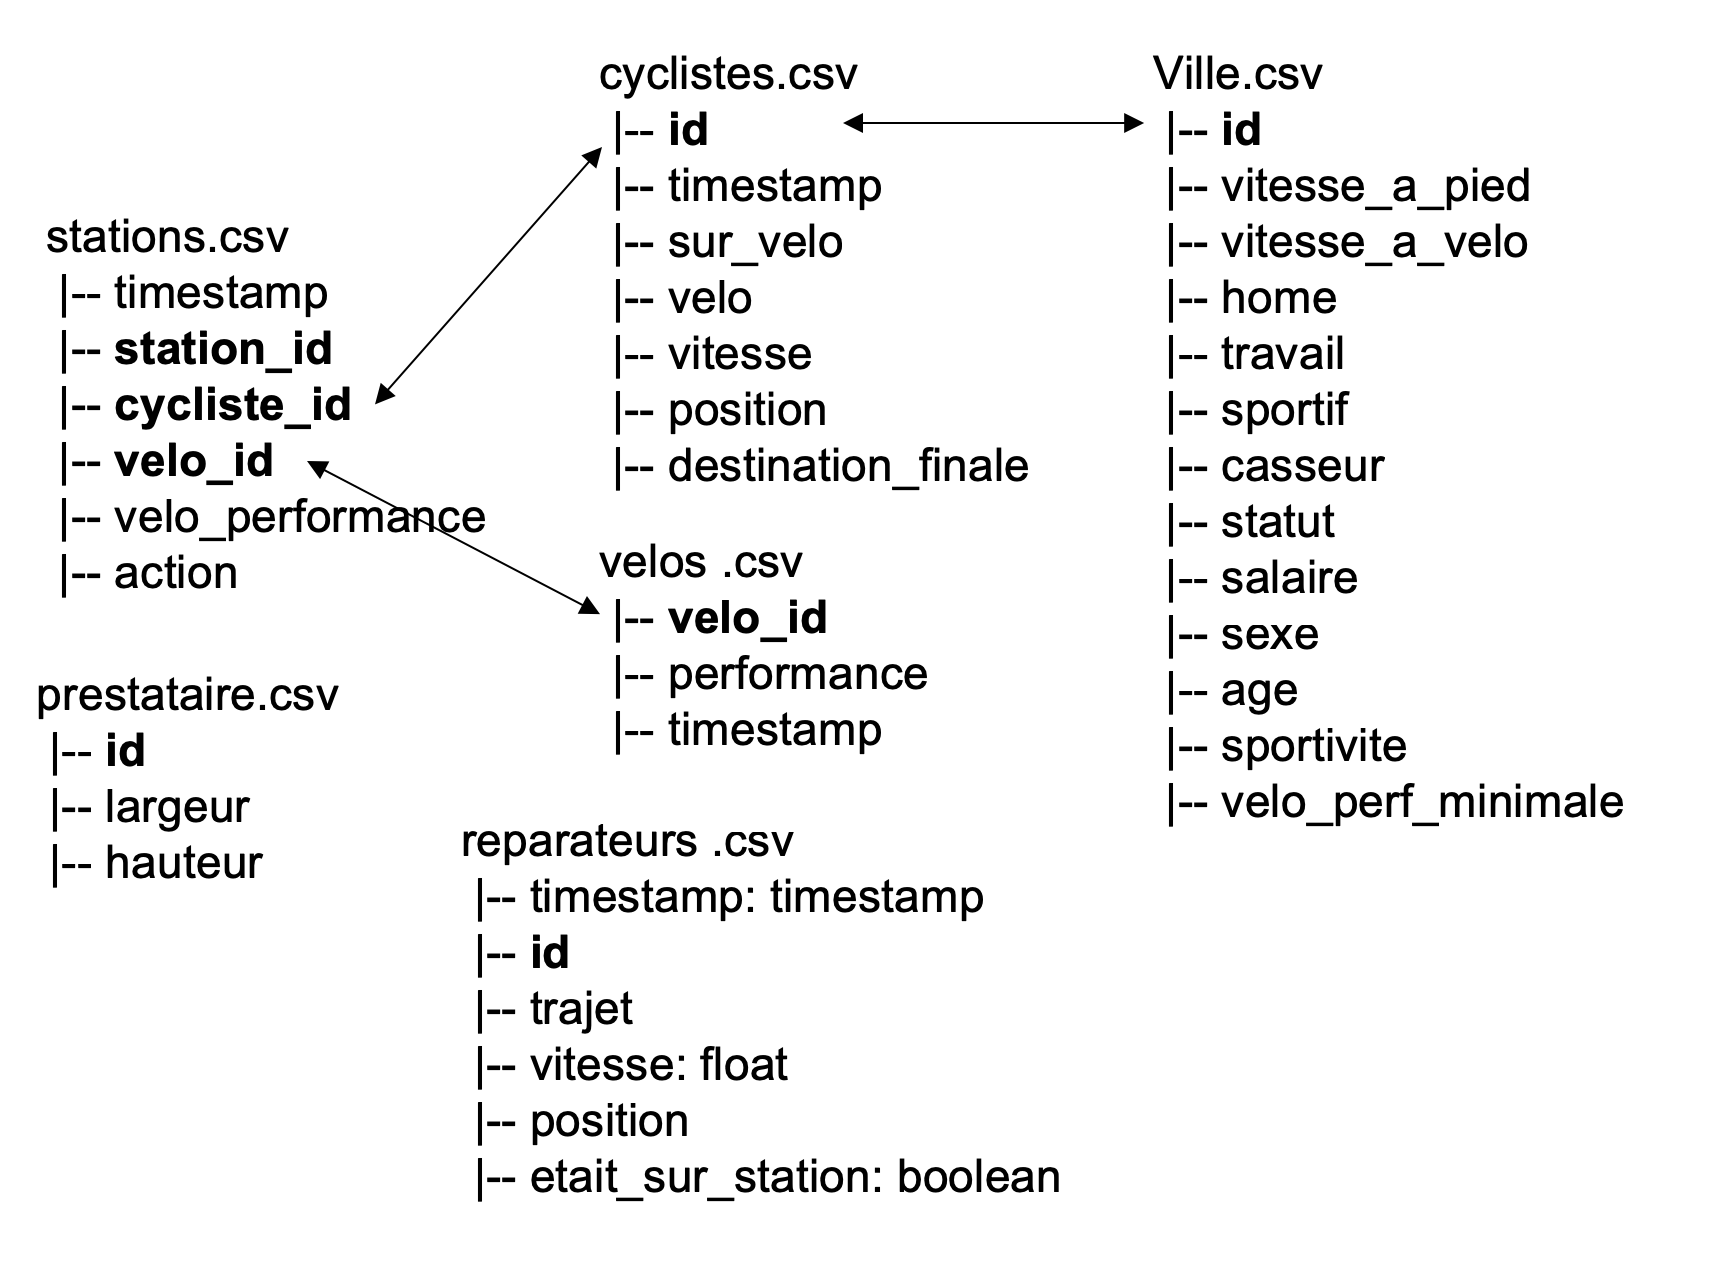


# Vérifions la jointure

In [312]:
jointure_cycliste_ville = cyclistes.join(ville, on="id", how="inner")

cyclistes.count(), ville.count(), jointure_cycliste_ville.count()

(79584, 51, 73389)

In [309]:
cyclistes.count(), ville.count(), jointure_cycliste_ville.count()

(79584, 51, 73389)

In [313]:
79584 - 73389

6195

# Il manque 79584 - 73389 = 6195 lignes !

In [310]:
cyclistes.join(ville,"id", "left_outer").where(ville.id.isNull()).select("id").count()

6195

In [311]:
cyclistes.join(ville,"id", "left_outer").where(ville.id.isNull()).select("id").distinct().collect()

[Row(id='54'), Row(id='52'), Row(id='55'), Row(id='53'), Row(id='56')]

In [315]:
cyclistes.join(ville,"id", "right_outer").where(cyclistes.id.isNull()).select("id").count()

0

In [318]:
stations.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- station_id: string (nullable = true)
 |-- cycliste_id: string (nullable = true)
 |-- velo_id: string (nullable = true)
 |-- velo_performance: string (nullable = true)
 |-- action: string (nullable = true)



In [321]:
stations.join(cyclistes,stations.cycliste_id== cyclistes.id, "left_outer").where(cyclistes.id.isNull()).select("id").count()


159

In [323]:
stations.join(cyclistes,stations.cyclbiste_id== cyclistes.id, "left_outer").where(cyclistes.id.isNull()).select("id").collect()

[Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=None),
 Row(id=No

In [255]:
path       = "./../data/Stations/log_stations_17.csv"
station_17 = spark.read.format("csv").option("header", "true").load(path)
print(station_17.count())
spark.createDataFrame(station_17.head(10)).toPandas()

27


,timestamp,station_id,cycliste_id,velo_id,velo_performance,action
0,timestamp,station_id,cycliste_id,velo_id,velo_performance,action
1,timestamp,station_id,performance,None,None,None
2,2018-01-01 05:11:00,17,1,None,None,None
3,reparee,None,None,None,None,None
4,2018-01-01 06:45:00,17,19,velo_130,0.85,recuperer
5,2018-01-01 06:45:00,17,1,None,None,None
6,2018-01-01 07:18:00,17,45,velo_224,0.85,donner
7,2018-01-01 07:18:00,17,1,None,None,None
8,2018-01-01 09:22:00,17,55,velo_229,0.85,donner
9,2018-01-01 09:22:00,17,1,None,None,None


Ici on est fasse à un fichier de log mal formatté. C'est souvent le cas dans la vie réelle... On a créé cet exemple pour apprendre à gérer ce type de difficulté. Expliquons nous sur la structure de ce fichier.
Il y a trois niveaux de logs : 
1. un niveau *complet* : lignes 4, 6, 8 par exemple. C'est le log normal auquel on devrait s'attendre : la station note l'heure, l'identifiant du cycliste et du vélo qui est pris à chaque *transaction*. La ligne 1 est d'ailleurs un bis-repetita des titres de la dataframe
2. un niveau *performance* :  ce sont les lignes 1, 2, 5, 7, 9 qui n'ont que les trois premières colonnes de remplies. On remarque que les dates sont les même que pour les lignes les précédents : la station enregistre son état / sa performance à chaque intéraction avec un cycliste.
3. un niveau *inutile* : la ligne 3, qui contient juste un log, sans heure. Il n'est pas clair que l'on puisse faire quelque chose avec cela, mais il faut le gérer.
L'enjeu ici va donc être de filtrer cette dataframe en trois, pour séparer ces trois informations. Comment faire ? 

On va utiliser une astuce qui consiste à filtrer en trois temps, avec les fonctions fournies dans le module *sql* de spark : 
- F.col : pour sélectionner une colonne spécifique
- F.isnull : pour savoir quelles lignes sont nulles

Le tout couplé à la clause *where* de la datframe, qui permet de ne retenir que les lignes où le filtre est vrai.

La structure des trois niveaux de logs nous permet de procéder de la manière suivante :

1. On récupère donc les lignes où la seconde colone *station_id* est nulle. 
2. On crée une nouvelle dataframe sans ces lignes a écarter, grâce à la fonction *exceptAll*
3. On fait de même sur cette nouvelle dataFrame, avec la colonne *velo_id* 
4.  En réutilisant *exceptAll* on obtient notre troisième dataFrame 

In [256]:
from pyspark.sql import functions as F
# 1. On récupère donc les lignes où la seconde colone station_id est nulle.
niveau_inutile = station_17.where(F.isnull(F.col("station_id")))
print(niveau_inutile.count(), niveau_inutile.show(3))

+---------+----------+-----------+-------+----------------+------+
|timestamp|station_id|cycliste_id|velo_id|velo_performance|action|
+---------+----------+-----------+-------+----------------+------+
|  reparee|      null|       null|   null|            null|  null|
|  reparee|      null|       null|   null|            null|  null|
| en panne|      null|       null|   null|            null|  null|
+---------+----------+-----------+-------+----------------+------+
only showing top 3 rows

5 None


Il faut aussi sélectionner uniquement la première colonne (timestamp) et la renommer : 

In [257]:
niveau_inutile.select("timestamp").withColumnRenamed("Timestamp", "Action").show(3)

+--------+
|  Action|
+--------+
| reparee|
| reparee|
|en panne|
+--------+
only showing top 3 rows



In [258]:
# 2. On crée une nouvelle dataframe sans ces lignes a écarter, grâce à la fonction exceptAll
reste_utile = station_17.exceptAll(niveau_inutile)
reste_utile.count(), reste_utile.show(3)

+-------------------+----------+-----------+--------+------------------+---------+
|          timestamp|station_id|cycliste_id| velo_id|  velo_performance|   action|
+-------------------+----------+-----------+--------+------------------+---------+
|2018-01-01 21:30:00|        17|         30|velo_230|0.8818604637760953|   donner|
|2018-01-01 06:45:00|        17|         19|velo_130|              0.85|recuperer|
|          timestamp|station_id|performance|    null|              null|     null|
+-------------------+----------+-----------+--------+------------------+---------+
only showing top 3 rows



(22, None)

In [259]:
# 3. On fait de même sur cette nouvelle dataFrame, avec la colonne velo_id
niveau_performance = reste_utile.where(F.isnull(F.col("velo_id")))
# 4. En réutilisant exceptAll on obtient notre troisième dataFrame
niveau_complet     = reste_utile.exceptAll(niveau_performance)

# Nous pouvons maintenant réduire le nombre de colonne dans la sous-datframe, avec la méthode select : 
niveau_performance = niveau_performance.select(["timestamp", "station_id", "cycliste_id"])
niveau_performance = niveau_performance.withColumnRenamed("cycliste_id", "performance")
niveau_performance.show(3)

+-------------------+----------+-----------+
|          timestamp|station_id|performance|
+-------------------+----------+-----------+
|          timestamp|station_id|performance|
|2018-01-01 05:11:00|        17|          1|
|2018-01-01 07:18:00|        17|          1|
+-------------------+----------+-----------+
only showing top 3 rows



On se rend compte que l'entête se répète au sein des données. On le supprime avec une clause Where : 

In [260]:
niveau_performance = niveau_performance.where(niveau_performance["timestamp"] != "timestamp" )
niveau_performance.sample(10/niveau_performance.count()).show()

+-------------------+----------+-----------+
|          timestamp|station_id|performance|
+-------------------+----------+-----------+
|2018-01-01 07:18:00|        17|          1|
|2018-01-01 06:45:00|        17|          1|
|2018-01-01 10:54:00|        17|          1|
|2018-01-01 10:59:00|        17|          1|
|2018-01-01 22:20:00|        17|          1|
|2018-01-01 21:30:00|        17|          1|
|2018-01-01 18:53:00|        17|          1|
|2018-01-01 14:56:00|        17|          1|
+-------------------+----------+-----------+



On peut vérifier qu'on a bien récupéré toutes les lignes : 

In [262]:
nb_de_ligne_total        = station_17.count()
nb_de_niveau_inutile     = niveau_inutile.count()
nb_de_niveau_performance = niveau_performance.count()
nb_de_niveau_complet     = niveau_complet.count()
print("""
nb_de_ligne_total         = {nb_de_ligne_total}
nb_de_niveau_inutile      = {nb_de_niveau_inutile}
nb_de_niveau_performance  = {nb_de_niveau_performance}
nb_de_niveau_complet      = {nb_de_niveau_complet}
""".format(**locals()))
# Note :  la somme ne correspond pas car nous avons supprimé des doublons de titre dans les clauses where


nb_de_ligne_total         = 27
nb_de_niveau_inutile      = 5
nb_de_niveau_performance  = 12
nb_de_niveau_complet      = 9



In [324]:
stations.toPandas()

,timestamp,station_id,cycliste_id,velo_id,velo_performance,action
0,timestamp,station_id,cycliste_id,velo_id,velo_performance,action
1,timestamp,station_id,performance,None,None,None
2,2018-01-01 01:54:00,13,1,None,None,None
3,reparee,None,None,None,None,None
4,2018-01-01 04:54:00,13,29,velo_131,0.85,donner
5,2018-01-01 04:54:00,13,1,None,None,None
6,2018-01-01 06:41:00,13,19,velo_130,0.85,donner
7,2018-01-01 06:41:00,13,1,None,None,None
8,en panne,None,None,None,None,None
9,2018-01-01 07:37:00,13,1,None,None,None


In [328]:
niveau_complet.join(
    cyclistes,niveau_complet.cycliste_id== cyclistes.id, "left_outer").where(
    cyclistes.id.isNull()).select("id").count()

25

In [331]:
niveau_complet.join(
    cyclistes,niveau_complet.cycliste_id== cyclistes.id, "left_outer").where(
    cyclistes.id.isNull()).toPandas()

,timestamp,station_id,cycliste_id,velo_id,velo_performance,action,id,timestamp,sur_velo,velo,vitesse,position,destination_finale
0,timestamp,station_id,cycliste_id,velo_id,velo_performance,action,None,None,None,None,None,None,None
1,timestamp,station_id,cycliste_id,velo_id,velo_performance,action,None,None,None,None,None,None,None
2,timestamp,station_id,cycliste_id,velo_id,velo_performance,action,None,None,None,None,None,None,None
3,timestamp,station_id,cycliste_id,velo_id,velo_performance,action,None,None,None,None,None,None,None
4,timestamp,station_id,cycliste_id,velo_id,velo_performance,action,None,None,None,None,None,None,None
5,timestamp,station_id,cycliste_id,velo_id,velo_performance,action,None,None,None,None,None,None,None
6,timestamp,station_id,cycliste_id,velo_id,velo_performance,action,None,None,None,None,None,None,None
7,timestamp,station_id,cycliste_id,velo_id,velo_performance,action,None,None,None,None,None,None,None
8,timestamp,station_id,cycliste_id,velo_id,velo_performance,action,None,None,None,None,None,None,None
9,timestamp,station_id,cycliste_id,velo_id,velo_performance,action,None,None,None,None,None,None,None


# Supprimer les lignes en doublons

In [333]:
niveau_complet.distinct().join(
    cyclistes,niveau_complet.cycliste_id== cyclistes.id, "left_outer").where(
    cyclistes.id.isNull()).toPandas()

,timestamp,station_id,cycliste_id,velo_id,velo_performance,action,id,timestamp,sur_velo,velo,vitesse,position,destination_finale
0,timestamp,station_id,cycliste_id,velo_id,velo_performance,action,None,None,None,None,None,None,None


In [342]:
!git add -f 3_comprendre_la_donnee.ipynb

In [343]:
!git commit -m "fichier à la fin de l'ecriture de la v13 du livre"

[detached HEAD 605d301] fichier à la fin de l'ecriture de la v13 du livre
 1 file changed, 44 insertions(+)


In [344]:
!git tag -a v13_chapitre_comprendre_la_donnnee_fini -m "etat final du notebook"

fatal: tag 'v13_chapitre_comprendre_la_donnnee_fini' already exists


In [345]:
!git push origin master

Everything up-to-date


In [347]:
!git branch tmp

In [348]:
!git checkout tmp

M	data/Cyclistes/cycliste_1.csv
M	data/Cyclistes/cycliste_10.csv
D	data/Cyclistes/cycliste_100.csv
D	data/Cyclistes/cycliste_101.csv
D	data/Cyclistes/cycliste_102.csv
D	data/Cyclistes/cycliste_103.csv
D	data/Cyclistes/cycliste_104.csv
D	data/Cyclistes/cycliste_105.csv
D	data/Cyclistes/cycliste_106.csv
D	data/Cyclistes/cycliste_107.csv
D	data/Cyclistes/cycliste_108.csv
D	data/Cyclistes/cycliste_109.csv
M	data/Cyclistes/cycliste_11.csv
D	data/Cyclistes/cycliste_110.csv
D	data/Cyclistes/cycliste_111.csv
D	data/Cyclistes/cycliste_112.csv
D	data/Cyclistes/cycliste_113.csv
D	data/Cyclistes/cycliste_114.csv
D	data/Cyclistes/cycliste_115.csv
D	data/Cyclistes/cycliste_116.csv
D	data/Cyclistes/cycliste_117.csv
D	data/Cyclistes/cycliste_118.csv
D	data/Cyclistes/cycliste_119.csv
M	data/Cyclistes/cycliste_12.csv
D	data/Cyclistes/cycliste_120.csv
D	data/Cyclistes/cycliste_121.csv
D	data/Cyclistes/cycliste_122.csv
D	data/Cyclistes/cycliste_123.csv
D	data/Cyclistes/cycliste_124.csv
D	data/Cyclistes/cy

In [350]:
!git add 3_comprendre_la_donnee.ipynb

In [351]:
!git commit -m "notebook a la fin de l'ecriture du chapitre 4 dans la v13 du livre"

[tmp 0d94d30] notebook a la fin de l'ecriture du chapitre 4 dans la v13 du livre
 1 file changed, 68 insertions(+), 7 deletions(-)


In [352]:
!git branch -f master tmp

In [353]:
!git push origin master

Enumerating objects: 14, done.
Counting objects: 100% (14/14), done.
Delta compression using up to 8 threads
Compressing objects: 100% (12/12), done.
Writing objects: 100% (12/12), 202.89 KiB | 12.68 MiB/s, done.
Total 12 (delta 5), reused 0 (delta 0)
remote: Resolving deltas: 100% (5/5), completed with 1 local object.
To https://github.com/romainjouin/livre_spark.git
   35fd6be..0d94d30  master -> master


In [354]:
!git tag -a fin_chap_4_livre_v13 -m "notebook a la fin de l'ecriture du chapitre 4 dans la v13 du livre"

In [355]:
!git push --tags

Enumerating objects: 2, done.
Counting objects: 100% (2/2), done.
Delta compression using up to 8 threads
Compressing objects: 100% (2/2), done.
Writing objects: 100% (2/2), 372 bytes | 372.00 KiB/s, done.
Total 2 (delta 0), reused 0 (delta 0)
To https://github.com/romainjouin/livre_spark.git
 * [new tag]         fin_chap_4_livre_v13 -> fin_chap_4_livre_v13
 * [new tag]         v13_chapitre_comprendre_la_donnnee_fini -> v13_chapitre_comprendre_la_donnnee_fini
